<a href="https://colab.research.google.com/github/Sanjana060101/ML-/blob/main/8_1_artificial_neural_network_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

---
ANN is used for Regression and Classification both

---




Input layers are the different parameters for only one observation ( 1 person ) . Output layer can predict continuous predictions , binary predictions , categorical predictions as well( for categorical predictions , output will be in dummy variable form , it will have multiple variables(several output values) )  

---

**What we're putting in is exactly for 1 row ( 1 observation) and what we're getting back as ouput is the output for that same row only**


---
Weights are really important for neural networks as through weights only they decides in every single case which signal is important and how much important . When we train on ANN , they are basically adjusting all of these wights in all the sign ups in this ANN . 

---
Sign ups - signals between layers 

---

Neuron takes input values with weights and gives the output value . What happens inside neuron = 1) It takes the weighted sum of all the input values that it's getting . 2) It applies the activation function to this weighted sum 

---
Activation function = threshold function , rectifier function , sigmoid function 




#Complete Guide To Artificial Neural Networks


---
https://www.superdatascience.com/blogs/the-ultimate-guide-to-artificial-neural-networks-ann


#How neural networks learn ? How weights are decided 


---

This reverse feedback occurs untill our cost function gets minimised . The wights will be updated again and again untill then

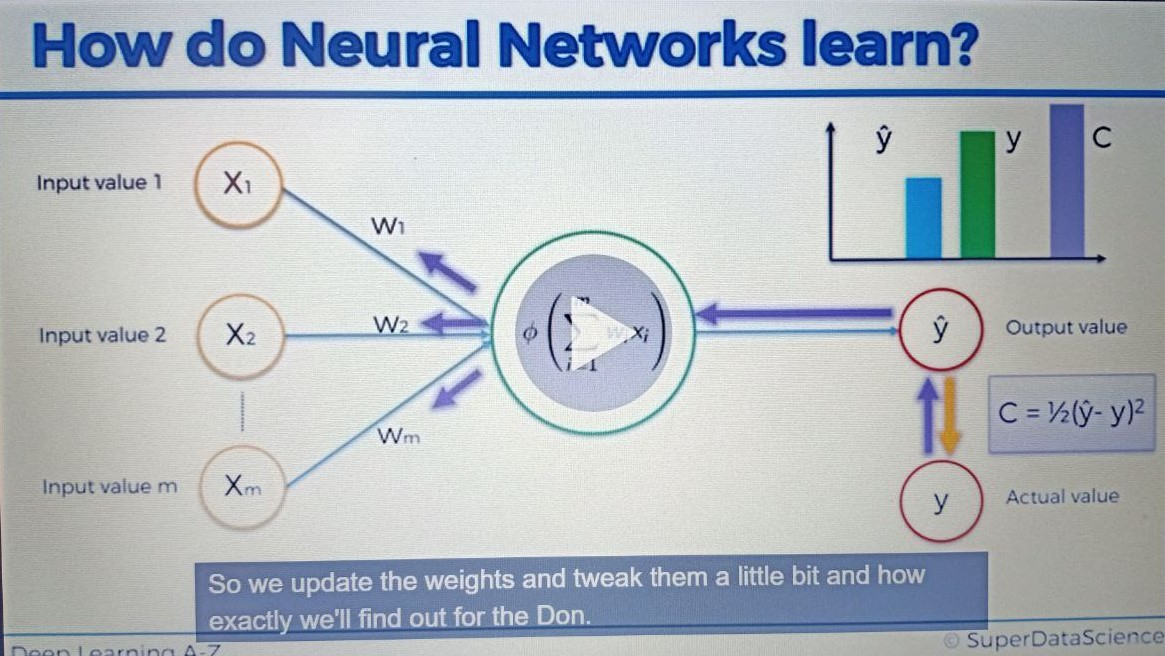

#Back Propogation 

---
We understood how it works for one single row . Now , for multiple rows : Calculate y^ for every row and now calculate the error for every y^ i.e. ( y(i) - y(i)^) . Cost function is the sum of all these errors . Now as our percptron is same for all the rows , finalised weights will also be same for all rows . Now the job is to minimise this cost function in every iteration , feedback the weights and this way find the min cost function value possible and the weights used to make it happen will become our finalised weights for this perceptron . hence , we reduced the error for the whole table . A single row might not be best with these finalised weights but for the whole data , whole table , these weights are the best as they reduced the sum of the errros in the table .

---

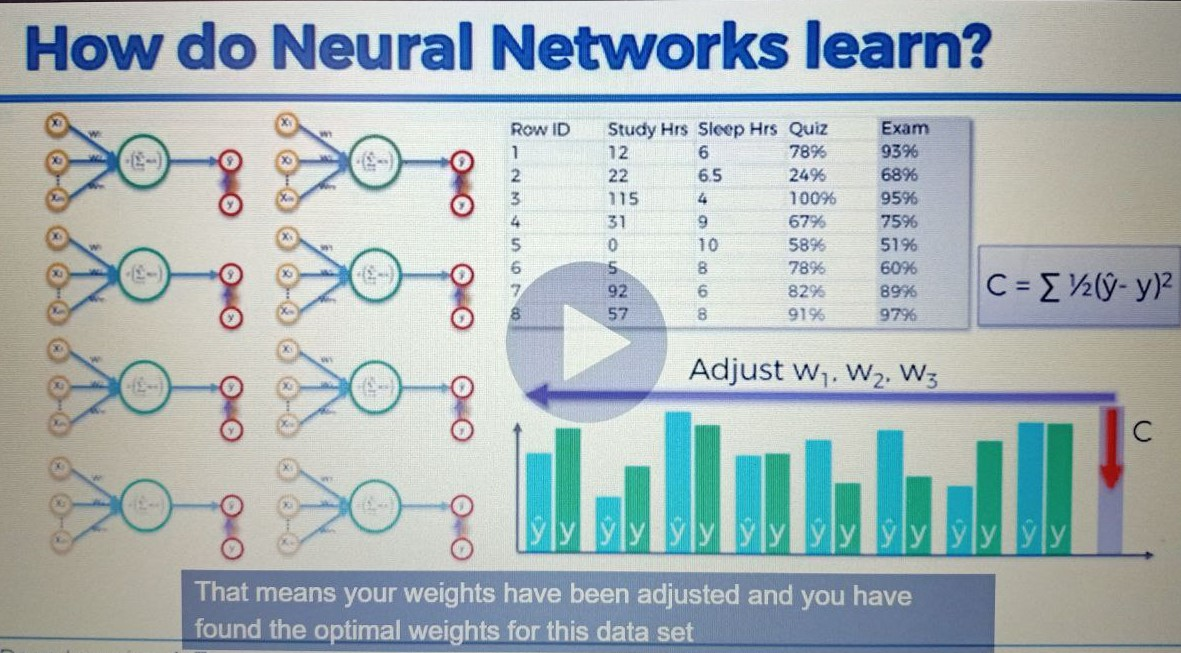


#Brute Force method, Gradient Descent and Stochastic gradient descent 

---
We take lots of possible weights and look at them and see which one works best , this take very very very lare time to compute . 


---

Gradient descent( 1-D example)  = to find the minimum cost function , we are rolling a boll down the cost function to find it's minimum value . As cost function is parabolic , we're rollling down the parabola and we're just going to the bottom by understanding which way we need to go by analysing different things ( like slope ) . But this metod is only applicable for convex gradient descent functions which have 1 global minimum . It will give wrong results if cost func is changed , or at highr dimensions the function is no more a convex or if it has local minima too . 

---

Gradient descent = takes all of the rows together , minimises cost functions and gives the adjusted weights .


***IN DEEP LEARNING , FOR NEURAL NETWORKS , FEATURE SCALING IS A MUST FOR ALLLLL VARIABLES , BE IT DUMMY(FROM ONE HOT ENCODING) OR ANY OTHER , WE WILL DO FEATURE SCALING ON ALL OF THEM AND SCALES WILL BE MADE FROM ALL OF THEM AS WELL***

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])   # Gender is column number 2 of feature matrix X

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()       # created an object which represent our ann from 'Sequential ' class 
# which is initialising this ann as sequence of layers 
# Now as keras is integerated in tensorflow , we imported Sequential class directly from there

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))  #Adding/creating a simple fully connected layer object
# It automatically adds the input layer as well
# This ' layers ' module contains all the classes we want to add layers in our ANN , from this module we called eense class
# Arguements of dense class : Units = corresponds to the number of hidden neurons , we want in our first HIDDEN LAYER 
# Neurons for input layers will be simply selected from our feature matrix , this above step is for hidden layers only
# As we want the rectifier activation function as the activation function in our hidden layer , we need to specify this by using its keyword 'relu'
# the dense class used here ensures whatever layer we're adding new is fully connected with the previous layer 

***The way to add a fully connected layer into ANN is to use Dense class . add() is a method from Sequential class . So , here , the fully connected layer we built will be created as an object of the dense class***

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))  # now , this same line adds the second hidden layer in our ANN
# This add() method can add any new layer at whatever stage of our ANN

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  #We use the same dense class here as we want this output layer to be fully 
# connected from the second layer , but these 2 parameters needs to be changed when we're adding the output layer 
# as we're predicting a binary result/variable , we onl need one neuron for our y^
# and we need signois activation function as our activation function because we need the probabilites of our outvome being one or zero

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
#Step 1 of training our ANN :- 
#compiling the ann with the optimizer , loss function and a metric to evaluate performance (we'll choose accuracy , because we're doing classification here)
# Optimiser = 'adam' optimiser , which is a high performance optimiser that performs stochastic gradient descent 
# when we're oing binary classification , where we have to predict a binary outcome , the loss function will always be this 'binary_crossentropy'
# For non - binary classification ( eg. predicting three categories) , use 'categorical_crossentropy' and activation function for output layer must be softmax activation function
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

# fit() method is alwys the same to train the models 
# batch_size is the size in whicch ee are running our predictions and losses altogether 

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7906
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8083
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8144
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8164
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8184
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8210
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8224
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4007 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [ ]:
#ann.predict([[sc.transform([1,0,0,600, 1, 40,3,60000,2,1,1,50000])]])
ann.predict(sc.transform([[1,0,0,600, 1, 40,3,60000,2,1,1,50000]]))

array([[0.03106707]], dtype=float32)

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1513   82]
 [ 201  204]]


0.8585